<a href="https://colab.research.google.com/github/kiranahire03/Bike-Linear-regression/blob/main/Seoul_Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project 2**


# **Project Title : Seoul Bike Sharing Demand Prediction**

## **Problem Description**


### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## **Data Description**


### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* Date : year-month-day
* Rented Bike count - Count of bikes rented at each hour
* Hour - Hour of he day
* Temperature-Temperature in Celsius
* Humidity - %
* Windspeed - m/s
* Visibility - 10m
* Dew point temperature - Celsius
* Solar radiation - MJ/m2
* Rainfall - mm
* Snowfall - cm
* Seasons - Winter, Spring, Summer, Autumn
* Holiday - Holiday/No holiday
* Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

## **Loading Dataset and importing Modules**

In [2]:
#importing useful libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime
import datetime as dt

In [3]:
#importing dataset
path = '/content/drive/MyDrive/SeoulBikeData.csv'
bike_df = pd.read_csv(path, encoding= 'unicode_escape')

## **Understanding the data**

In [4]:
#Getting first five rows
bike_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#Getting last five rows
bike_df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
#Getting number of rows and columns
bike_df.shape

(8760, 14)

In [7]:
#check details about the data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [8]:
#Gettting columns in dataset
print('Features of the Dataset : ')
bike_df.columns

Features of the Dataset : 


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [9]:
#Getting datatype
bike_df.dtypes

Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object

In [10]:
#Looking for the description of the dataset to get insights of the data
bike_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [11]:
#finding unique values
bike_df.nunique()


Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**This Dataset contains 8760 lines and 14 columns**.

## **Features description**

**Breakdown of Our Features:**

**Date** : The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : str, we need to convert into datetime format.

**Rented Bike Count** : Number of rented bikes per hour which our dependent variable and we need to predict that, type : int

**Hour**: The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.

**Temperature(°C)**: Temperature in Celsius, type : Float

**Humidity(%)**: Humidity in the air in %, type : int

**Wind speed (m/s)** : Speed of the wind in m/s, type : Float

**Visibility (10m**): Visibility in m, type : int

**Dew point temperature(°C)**: Temperature at the beggining of the day, type : Float

**Solar Radiation (MJ/m2)**: Sun contribution, type : Float

**Rainfall(mm)**: Amount of raining in mm, type : Float

**Snowfall (cm)**: Amount of snowing in cm, type : Float

**Seasons**: *Season of the year, type : str, there are only 4 season's in data *.

**Holiday**: If the day is holiday period or not, type: str

**Functioning Day**: If the day is a Functioning Day or not, type : str

## **Preprocessing the dataset**

### **Missing values**

In [12]:
#Checking for the missing values
bike_df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

**From above we can conclude that there are no missing values in our dataset**.

### **Changing column name**

In [13]:
bike_df = bike_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

**The "Date" column as a object type basically it reads as a string, so its necessary to convert date column into datetime format then we split it into 3 column i.e 'year', 'month', 'day'as a category data type.**

### **Breaking 'Date' Column**

In [14]:
# Changing the "Date" column into three "year","month","day" column
bike_df['Date'] = bike_df['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,"%d/%m/%Y"))

In [15]:
bike_df['year'] = bike_df['Date'].dt.year
bike_df['Month'] = bike_df['Date'].dt.month
bike_df['day'] = bike_df['Date'].dt.day_name()

In [16]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_df['weekdays_weekend']=bike_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_df=bike_df.drop(columns=['Date','day','year'],axis=1)

**So we convert the "date" column into 3 different column i.e "year","month","day".**

**The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.**

**The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.**


In [17]:
bike_df.head()

,Rented_Bike_Count,Hour,Temperature,Humidity,Wind_speed,Visibility,Dew_point_temperature,Solar_Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning_Day,Month,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,12,0


In [18]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rented_Bike_Count      8760 non-null   int64  
 1   Hour                   8760 non-null   int64  
 2   Temperature            8760 non-null   float64
 3   Humidity               8760 non-null   int64  
 4   Wind_speed             8760 non-null   float64
 5   Visibility             8760 non-null   int64  
 6   Dew_point_temperature  8760 non-null   float64
 7   Solar_Radiation        8760 non-null   float64
 8   Rainfall               8760 non-null   float64
 9   Snowfall               8760 non-null   float64
 10  Seasons                8760 non-null   object 
 11  Holiday                8760 non-null   object 
 12  Functioning_Day        8760 non-null   object 
 13  Month                  8760 non-null   int64  
 14  weekdays_weekend       8760 non-null   int64  
dtypes: f

In [19]:
bike_df['weekdays_weekend'].value_counts()

0    6264
1    2496
Name: weekdays_weekend, dtype: int64

## **Changing data type**

**In our dataset"Hour","month","weekdays_weekend" column are integer data type but  it should be category data type. so we need to change this data type.**


In [20]:
bike_df.nunique()

Rented_Bike_Count        2166
Hour                       24
Temperature               546
Humidity                   90
Wind_speed                 65
Visibility               1789
Dew_point_temperature     556
Solar_Radiation           345
Rainfall                   61
Snowfall                   51
Seasons                     4
Holiday                     2
Functioning_Day             2
Month                      12
weekdays_weekend            2
dtype: int64

In [21]:
#Changing datatype
cols = ['Hour','Month','weekdays_weekend']
for i in cols:
  bike_df[i] = bike_df[i].astype('category') 

In [22]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Rented_Bike_Count      8760 non-null   int64   
 1   Hour                   8760 non-null   category
 2   Temperature            8760 non-null   float64 
 3   Humidity               8760 non-null   int64   
 4   Wind_speed             8760 non-null   float64 
 5   Visibility             8760 non-null   int64   
 6   Dew_point_temperature  8760 non-null   float64 
 7   Solar_Radiation        8760 non-null   float64 
 8   Rainfall               8760 non-null   float64 
 9   Snowfall               8760 non-null   float64 
 10  Seasons                8760 non-null   object  
 11  Holiday                8760 non-null   object  
 12  Functioning_Day        8760 non-null   object  
 13  Month                  8760 non-null   category
 14  weekdays_weekend       8760 non-null   c

# **Exploratory Data Analysis Of The Data Set**

### **Dependent Variable:**
A dependent variable is a variable whose value will change depending on the value of another variable. In out dataset, Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot. First we analyze the category data tyep then we proceed with the numerical data type.



### **Analysis of categorical variables**

In our dataset, we have categorical variables such as 'Hour' , 'Month',  'weekdays_weekend' , 'Seasons' , 'Holiday' , 'Functioning_Day'. Our dependent variable is "Rented Bike Count" so we need to analysis this column with the other columns by using some visualisation plot.

### ***Month***

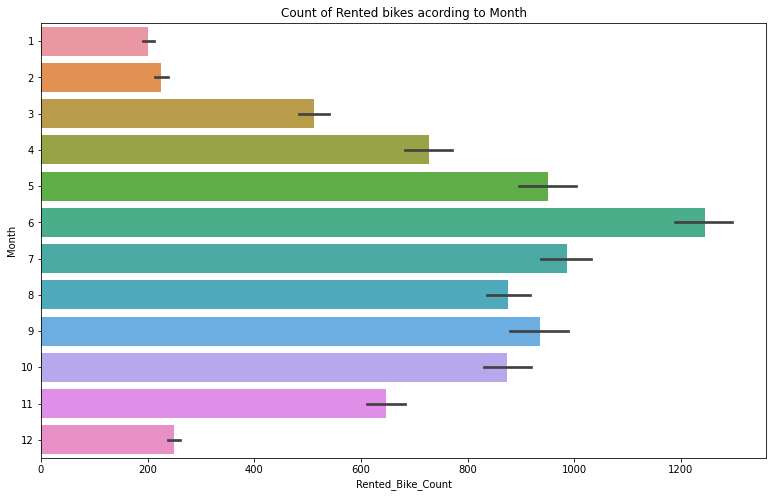

In [23]:
#Data visualization for Count of Rented bikes acording to Month
plt.figure(figsize = (13,8))
sns.barplot(x = 'Rented_Bike_Count',y = 'Month',data = bike_df)
plt.title('Count of Rented bikes acording to Month')
plt.show()



*   **From the above bar plot we conclude  that from the month 5 to 10 the demand of the rented bike is high as compare to other months.These months fall in the summer season. So we can say that demand.**




### ***weekdays_weekend***

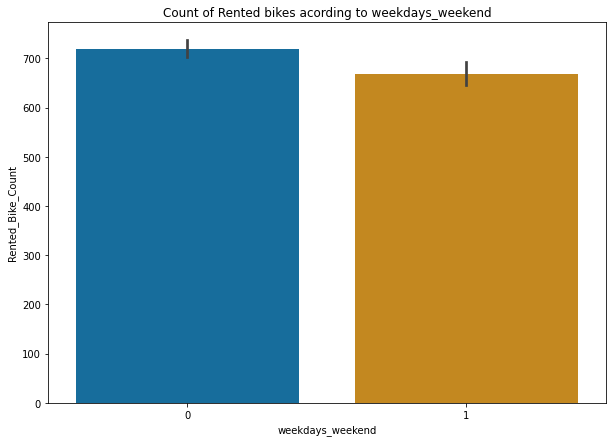

In [24]:
#Data visualization Count of Rented bikes acording to weekdays_weekend
plt.figure(figsize = (10,7))
sns.barplot(x = 'weekdays_weekend',y = 'Rented_Bike_Count',data = bike_df,palette = 'colorblind')
plt.title('Count of Rented bikes acording to weekdays_weekend')
plt.show()

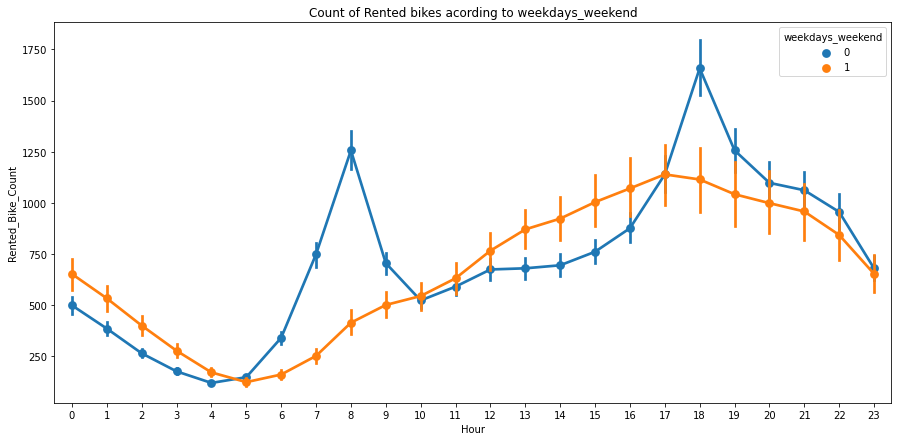

In [25]:
plt.figure(figsize = (15,7))
sns.pointplot(x = 'Hour',y = 'Rented_Bike_Count',hue = 'weekdays_weekend',data = bike_df)
plt.title('Count of Rented bikes acording to weekdays_weekend')
plt.show()
              




*   **From the above point plot and bar plot we conclude that in the week days which represent in blue colur show that the demand of the bike higher during 7am to 9am and 5pm to 7pm.**

*   **The orange colur represent the weekend days, and it show that the demand of rented bikes are very low specially in the morning hour**.




### ***Hour***

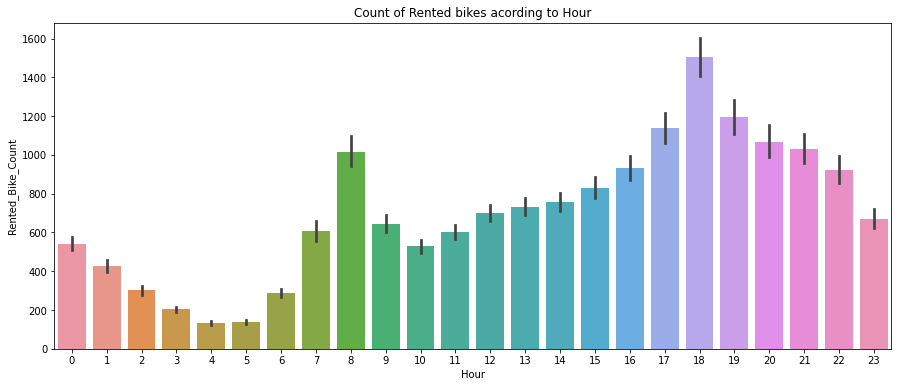

In [26]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Hour',y = 'Rented_Bike_Count',data = bike_df)
plt.title('Count of Rented bikes acording to Hour')
plt.show()

*   **The above plot shows the use of rented bike according the hours.**
*   **From the above plot we conclude that people generally use rented bikes during working hours from 7am to 9am and 5pm to 7pm**






### ***Functioning_Day***

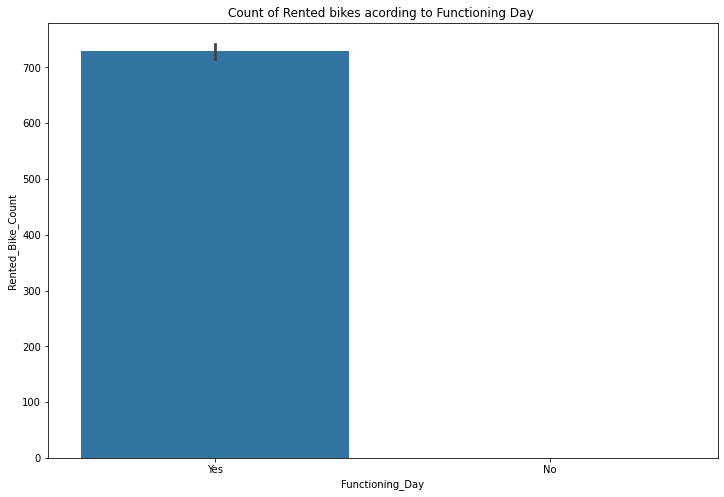

In [27]:
plt.figure(figsize = (12,8))
sns.barplot(x = 'Functioning_Day',y = 'Rented_Bike_Count', data = bike_df)
plt.title('Count of Rented bikes acording to Functioning Day ')
plt.show()

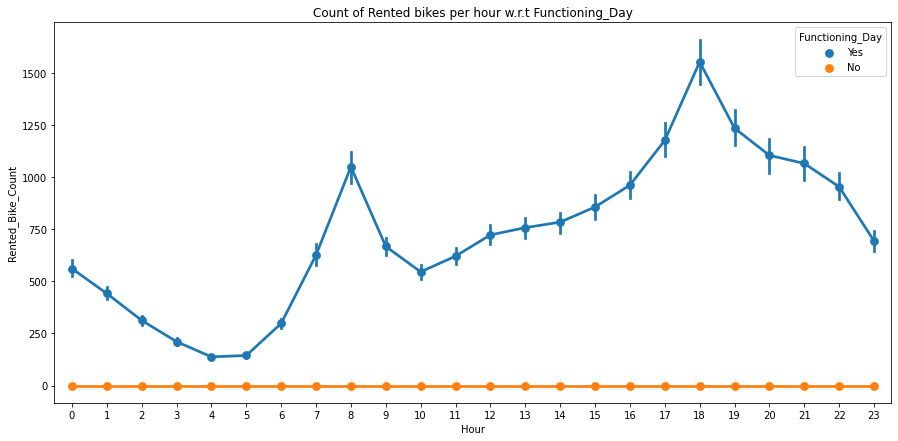

In [28]:
plt.figure(figsize = (15,7))
sns.pointplot(x = 'Hour',y = 'Rented_Bike_Count',hue = 'Functioning_Day',data = bike_df)
plt.title('Count of Rented bikes per hour w.r.t Functioning_Day')
plt.show()

*   **From above bar plot and point plot we can conclude that  people do not use rented bikes on non functioning day.**



### ***Seasons***

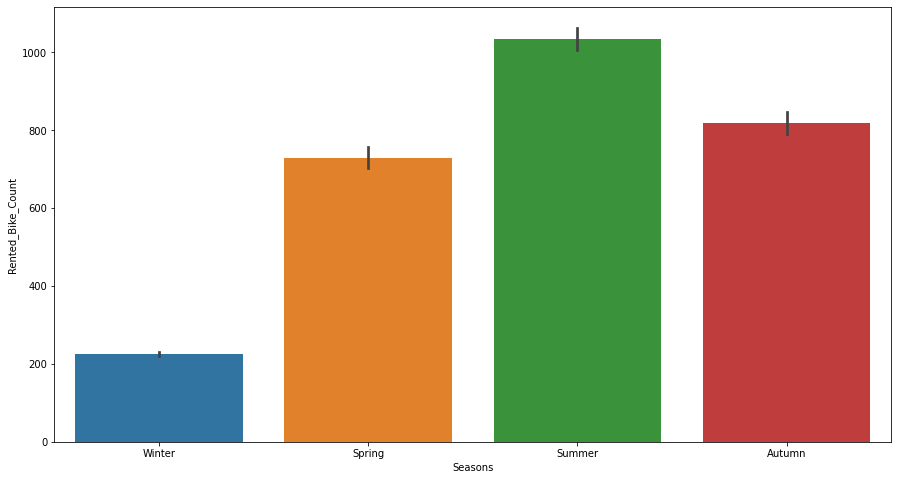

In [29]:
plt.subplots(figsize = (15,8))
sns.barplot(x = 'Seasons', y = 'Rented_Bike_Count', data = bike_df)
plt.show()

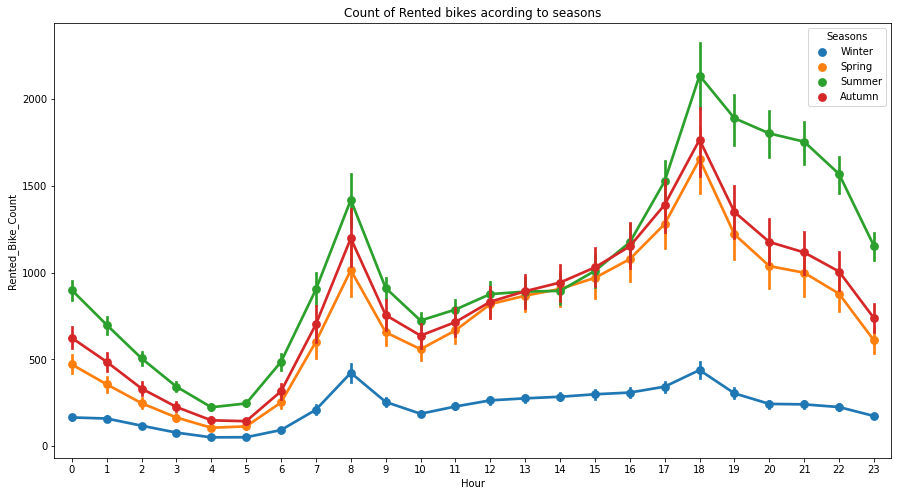

In [30]:
plt.subplots(figsize = (15,8))
sns.pointplot(x = 'Hour', y = 'Rented_Bike_Count',hue = 'Seasons', data = bike_df)
plt.title('Count of Rented bikes acording to seasons')
plt.show()

*   **The above bar plot and point plot which shows the use of rented bike in in four different seasons, and it clearly shows that, In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.**

*   **In winter season the use of rented bike is very low because of snowfall.**



### ***Holiday***

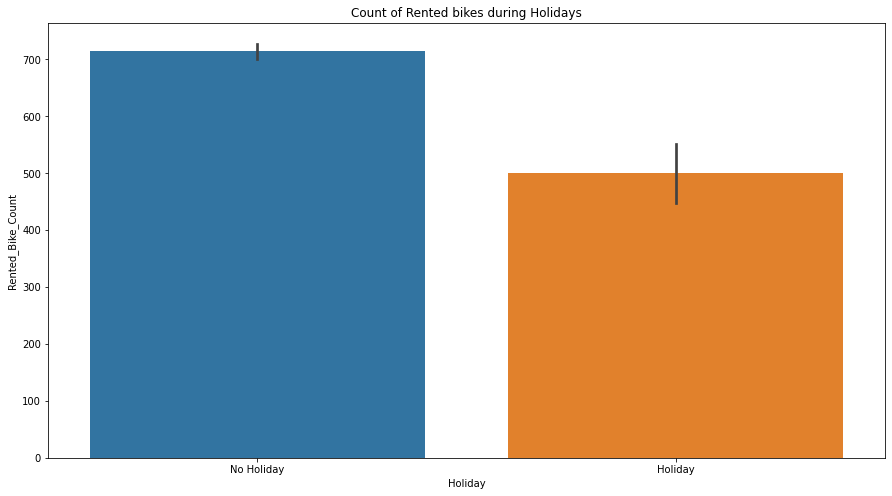

In [31]:
plt.subplots(figsize = (15,8))
sns.barplot(x = 'Holiday', y = 'Rented_Bike_Count', data = bike_df)
plt.title('Count of Rented bikes during Holidays')
plt.show()

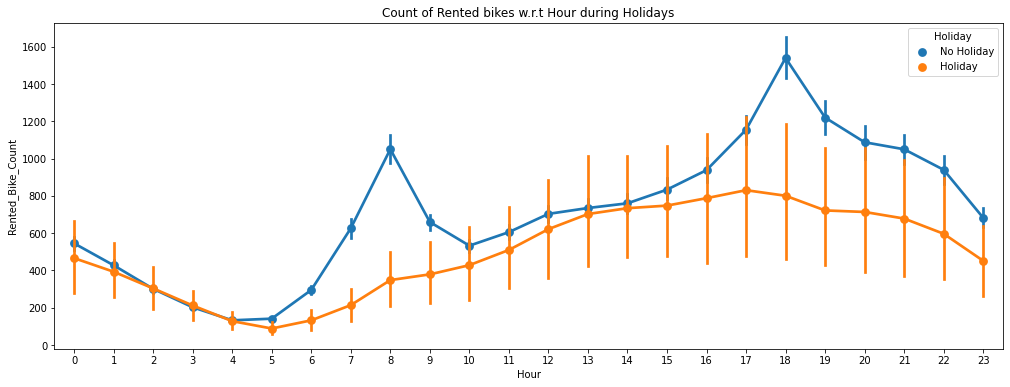

In [32]:
plt.subplots(figsize = (17,6))
sns.pointplot(x = 'Hour', y = 'Rented_Bike_Count',hue = 'Holiday', data = bike_df)
plt.title('Count of Rented bikes w.r.t Hour during Holidays')
plt.show()

**The above barplot and point plot shows the use of Rented bikes during holidays and from above plots we can say that people generally use rented bikes between 2pm to 8pm on holidays.** 

### **Analysis of Numerical  variables**

**First we try to to analyze the distribution of all numerical features.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

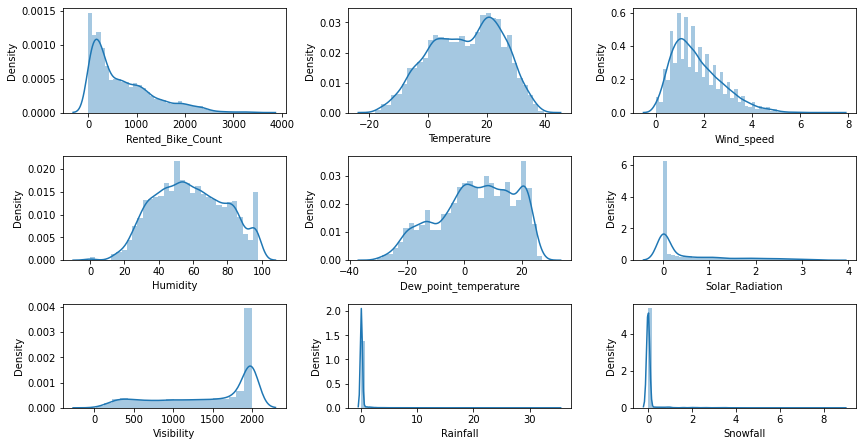

In [33]:
fig = plt.subplots(figsize = (12,12))
for i,j in enumerate(['Rented_Bike_Count','Temperature','Wind_speed','Humidity','Dew_point_temperature','Solar_Radiation','Visibility','Rainfall','Snowfall']):
  plt.subplot(6, 3, i+1)
  plt.subplots_adjust(hspace = 1.0)
  sns.distplot(bike_df[j])
  plt.tight_layout()

## **Numerical vs Rented_Bike_Count**

***Rented_Bike_Count  Vs Temperature***

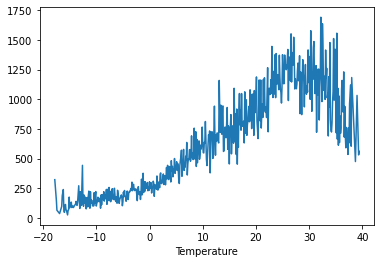

In [34]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

*   **From above graph we conclude that people like to ride bikes when the tempreture is around 25°C**



***Rented_Bike_Count  Vs Wind_speed***

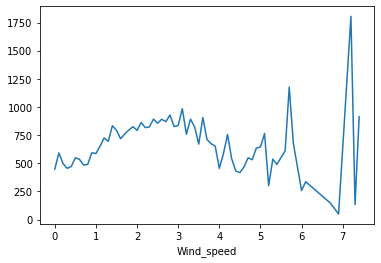

In [35]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

*   **From above plot we can say that Wind_speed is uniformely distributed but when Wind_speed is around 7 m/s demand for bikes is higher so we can say that people likes to ride bikes when its little windy.**



***Rented_Bike_Count  Vs Humidity***

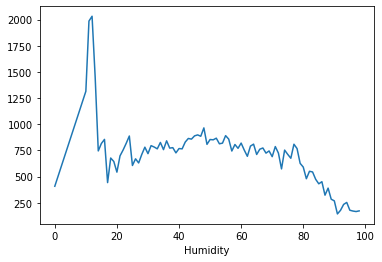

In [36]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Humidity"
bike_df.groupby('Humidity').mean()['Rented_Bike_Count'].plot()

*   **From the above graph we can say that demand for rented bikes is higher when humidity is around 10.**




***Rented_Bike_Count  Vs Rainfall***

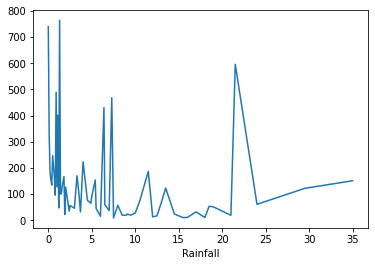

In [37]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

* **We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes**

***Rented_Bike_Count  Vs Dew_point_temperature***

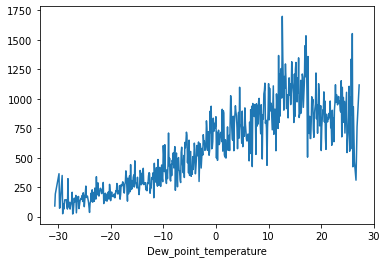

In [38]:
#plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"
bike_df.groupby('Dew_point_temperature').mean()['Rented_Bike_Count'].plot()

*   **From the above plot we can say that demand for rented bikes is high when Dew point tempreture is between 10 to 20.**




***Rented_Bike_Count  Vs Snowfall***

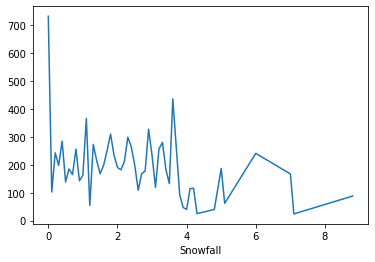

In [39]:
bike_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

*   **From this we can see when there was no snow then the demand is highest whereas when the snow is more than 4 cm then demand is decreasing.**



##**Normalizing Rented_Bike_Count column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


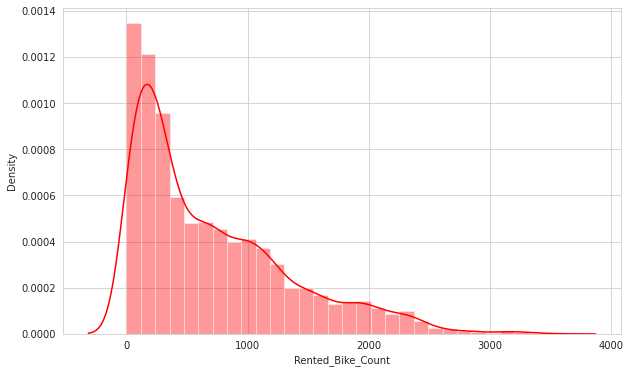

In [40]:
#Checking for Distribution plot for rented bike count
plt.figure(figsize=(10,6))
sns.set_style('whitegrid')
sns.distplot(bike_df['Rented_Bike_Count'],color ='red', bins = 30)

* **The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**
*   **To reduce the right skewness we will apply Square root method.**




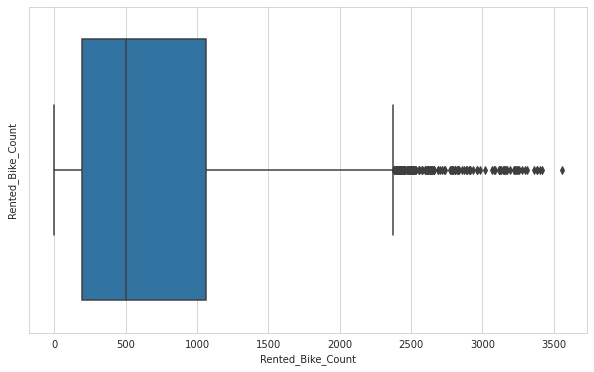

In [41]:
#Checking for outliers
plt.figure(figsize = (10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x = bike_df['Rented_Bike_Count'] )
plt.show()

**The above boxplot has detected outliers in Rented_Bike_Count so we are going to apply Square root to improve its skewness.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


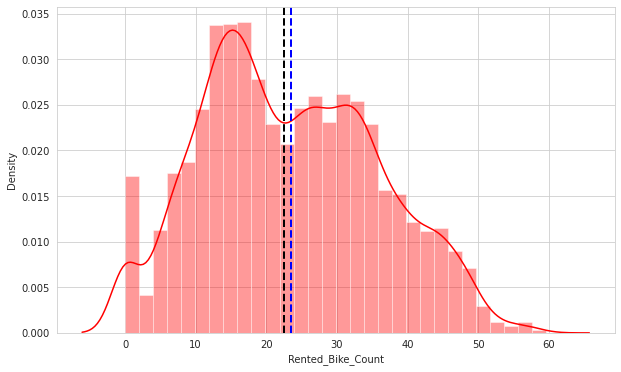

In [42]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(bike_df['Rented_Bike_Count']), color ='red', bins = 30)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).mean(), color='blue', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

*   **We have applied Square root for skewed variable to make it Normal distribution. From the above plot we can say that after applying Square Root method,  Rented_Bike_Count column now is in Normal Distribution.**
*   **Now let's check for outliers still present or not.**

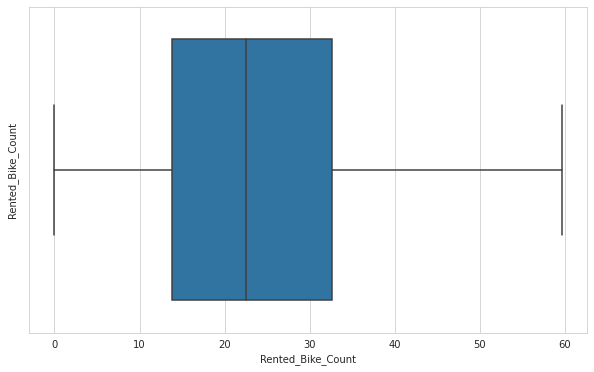

In [43]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize = (10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x = np.sqrt(bike_df['Rented_Bike_Count'] ))
plt.show()

* **After applying Square root to the Rented Bike Count column, we find that there is no outliers present.**

##**Checking of Correlation between variables**

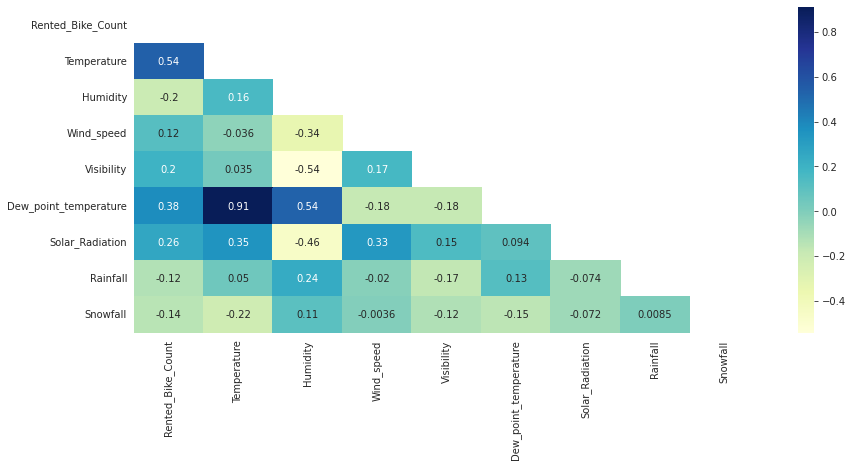

In [44]:
#Get corelation between different variables
corr = bike_df.corr()
plt.figure(figsize = (14,6))
mask = np.triu(np.ones_like(bike_df.corr()))
sns.heatmap(corr,annot = True,cmap="YlGnBu",mask = mask)
plt.show()

**From the above Heatmap we can say that target variable Rented_Bike_Count is positively corelated with :**

*   Tempreture
*   Dew_point_tempreture
*   Solar_Radiation

**And negatively corelated with :**

*   Rainfall
*   Snowfall








*   **From the above correlation heatmap, We see that there is a positive correlation between columns 'Temperature' and 'Dew point temperature' i.e 0.91 so even if we drop this column then it dont affects the outcome of our analysis.So we can drop the column 'Dew point temperature(°C)'.**



In [45]:
#drop the Dew point temperature column
bike_df=bike_df.drop(['Dew_point_temperature'],axis=1)

In [46]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  Month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


## **Create Dummy Variables**

**A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables.**

In [47]:
#Assign all catagoriacla features to a variable
categorical_features=list(bike_df.select_dtypes(['object','category']).columns)
categorical_features=pd.Index(categorical_features)
categorical_features

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'Month',
       'weekdays_weekend'],
      dtype='object')

## **One Hot Encoding**

**Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.**

In [48]:
#creat a copy
bike_df_copy = bike_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_features:
    bike_df_copy = one_hot_encoding(bike_df_copy, col)
bike_df_copy.head()

,Rented_Bike_Count,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_1
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [49]:
bike_df_copy.columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7',
       'Month_8', 'Month_9', 'Month_10', 'Month_11', 'Month_12',
       'weekdays_weekend_1'],
      dtype='object')

#**Linear Regression Model**

**First we need to split the dataset into a training and test set.**

In [50]:
#Assign the value in X and Y
X = bike_df_copy.drop(columns = ['Rented_Bike_Count'],axis = 1)
y = np.sqrt(bike_df_copy['Rented_Bike_Count'])

In [51]:
#X is our Indepedent Variable in our dataset.
X.head()

,Temperature,Humidity,Wind_speed,Visibility,Solar_Radiation,Rainfall,Snowfall,Hour_1,Hour_2,Hour_3,...,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,weekdays_weekend_1
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,-5.5,38,0.8,2000,0.0,0.0,0.0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [52]:
#y is Target/Depedent Variable in Dataset.
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [57]:
#Create test and train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [58]:
#import packages needed for Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train)

In [59]:
#check the score
reg.score(X_train, y_train)

0.7722101548255267

In [60]:
#check the coefficeint
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [61]:
#get the X_train and X-test value
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)